<a href="https://colab.research.google.com/github/developer-john67/Gaming_app/blob/main/project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opendatasets --quiet
!pip install shap --quiet

In [ ]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/mssmartypants/rice-type-classification")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: jokamau
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/mssmartypants/rice-type-classification


100%|██████████| 888k/888k [00:00<00:00, 684MB/s]

In [ ]:
import pandas as pd
import numpy as np


In [ ]:
import torch
import torch.optim as optim
import torch.nn as nn
from torch.utils.data import DataLoader, random_split, Dataset
from torchsummary import summary
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df= pd.read_csv("/content/rice-type-classification/riceClassification.csv")

In [ ]:
df.head()

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,1,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,1
1,2,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,1
2,3,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,1
3,4,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,1
4,5,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18185 entries, 0 to 18184
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               18185 non-null  int64  
 1   Area             18185 non-null  int64  
 2   MajorAxisLength  18185 non-null  float64
 3   MinorAxisLength  18185 non-null  float64
 4   Eccentricity     18185 non-null  float64
 5   ConvexArea       18185 non-null  int64  
 6   EquivDiameter    18185 non-null  float64
 7   Extent           18185 non-null  float64
 8   Perimeter        18185 non-null  float64
 9   Roundness        18185 non-null  float64
 10  AspectRation     18185 non-null  float64
 11  Class            18185 non-null  int64  
dtypes: float64(8), int64(4)
memory usage: 1.7 MB


In [ ]:
df.describe()

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
count,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000
mean,9093.000000,7036.492989,151.680754,59.807851,0.915406,7225.817872,94.132952,0.616653,351.606949,0.707998,2.599081,0.549079
std,5249.701658,1467.197150,12.376402,10.061653,0.030575,1502.006571,9.906250,0.104389,29.500620,0.067310,0.434836,0.497599
min,1.000000,2522.000000,74.133114,34.409894,0.676647,2579.000000,56.666658,0.383239,197.015000,0.174590,1.358128,0.000000
25%,4547.000000,5962.000000,145.675910,51.393151,0.891617,6125.000000,87.126656,0.538530,333.990000,0.650962,2.208527,0.000000
50%,9093.000000,6660.000000,153.883750,55.724288,0.923259,6843.000000,92.085696,0.601194,353.088000,0.701941,2.602966,1.000000
75%,13639.000000,8423.000000,160.056214,70.156593,0.941372,8645.000000,103.559146,0.695664,373.003000,0.769280,2.964101,1.000000
max,18185.000000,10210.000000,183.211434,82.550762,0.966774,11008.000000,114.016559,0.886573,508.511000,0.904748,3.911845,1.000000


In [ ]:
df.isnull().sum()

,0
id,0
Area,0
MajorAxisLength,0
MinorAxisLength,0
Eccentricity,0
ConvexArea,0
EquivDiameter,0
Extent,0
Perimeter,0
Roundness,0


In [ ]:
df = df.drop(['id'], axis=1)

In [ ]:
df.shape

(18185, 11)

In [ ]:
df.Class.value_counts()

,count
Class,
1,9985
0,8200


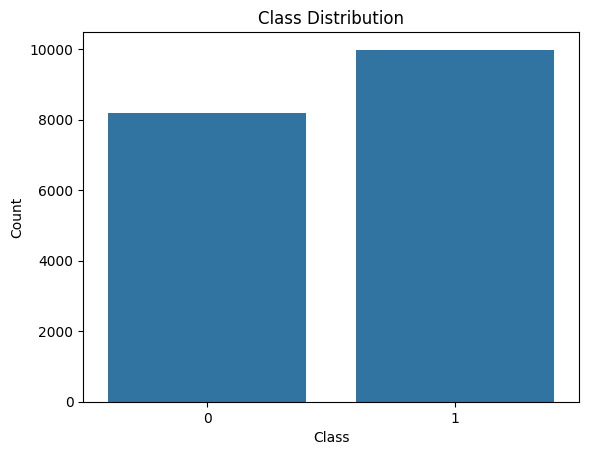

In [ ]:
sns.countplot(data=df, x="Class")
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()


In [ ]:
device= torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cpu


In [ ]:
for col in df.columns:
  unique= df[col].unique()
  print(f"Column '{col}': {unique}")

Column 'Area': [4537 2872 3048 ... 7614 7408 7595]
Column 'MajorAxisLength': [ 92.2293165   74.69188071  76.2931638  ... 154.7770845  151.3979239
 153.0819809 ]
Column 'MinorAxisLength': [64.01276874 51.40045446 52.04349114 ... 52.90808455 51.47459975
 51.59060559]
Column 'Eccentricity': [0.71991623 0.72555275 0.73121093 ... 0.93976032 0.94042709 0.94150002]
Column 'ConvexArea': [4677 3015 3132 ... 8260 7699 7058]
Column 'EquivDiameter': [76.00452496 60.47101762 62.29634124 ... 98.46037728 97.11930059
 98.33745137]
Column 'Extent': [0.65753623 0.71300894 0.75915318 ... 0.56128748 0.49239921 0.48997524]
Column 'Perimeter': [273.085 208.317 210.012 ... 385.506 342.253 343.371]
Column 'Roundness': [0.76450961 0.8316582  0.86843357 ... 0.68283181 0.63522692 0.6722741 ]
Column 'AspectRation': [1.44079562 1.45313658 1.46595015 ... 2.92539573 2.94121614 2.96724528]
Column 'Class': [1 0]


In [ ]:
new_df = df.copy() # Creating a copy of the original Dataframe to use to normalize inference

for column in df.columns:
    df[column] = df[column]/df[column].abs().max() # Divide by the maximum of the column which will make max value of each column is 1
df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,0.444368,0.503404,0.775435,0.744658,0.424873,0.666610,0.741661,0.537029,0.844997,0.368316,1.0
1,0.281293,0.407681,0.622653,0.750489,0.273892,0.530370,0.804230,0.409661,0.919215,0.371471,1.0
2,0.298531,0.416421,0.630442,0.756341,0.284520,0.546380,0.856278,0.412994,0.959862,0.374747,1.0
3,0.300979,0.420463,0.629049,0.764024,0.286791,0.548616,0.883772,0.414262,0.961818,0.379222,1.0
4,0.361704,0.464626,0.682901,0.775033,0.345385,0.601418,0.867808,0.452954,0.966836,0.386007,1.0


In [ ]:
X= np.array(df.iloc[:, :-1])
y= np.array(df.iloc[:, -1])

In [ ]:
print(X.shape)
print(y.shape)

(18185, 10)
(18185,)


In [ ]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.2, random_state= 42)

In [ ]:
X_test, X_val, y_test, y_val= train_test_split(X_test, y_test, test_size= 0.5)

In [ ]:
print("Training set is: ", X_train.shape[0], " rows which is ", round(X_train.shape[0]/df.shape[0],4)*100, "%") # Print training shape
print("Validation set is: ",X_val.shape[0], " rows which is ", round(X_val.shape[0]/df.shape[0],4)*100, "%") # Print validation shape
print("Testing set is: ",X_test.shape[0], " rows which is ", round(X_test.shape[0]/df.shape[0],4)*100, "%") # Print testing shape

Training set is:  14548  rows which is  80.0 %
Validation set is:  1819  rows which is  10.0 %
Testing set is:  1818  rows which is  10.0 %


In [ ]:
np.unique(y_train, return_counts=True)

(array([0., 1.]), array([6568, 7980]))

In [ ]:
from imblearn.over_sampling import SMOTE
smote= SMOTE(random_state= 42, k_neighbors= 5)
X_train, y_train= smote.fit_resample(X_train, y_train)

In [ ]:
np.unique(y_train, return_counts=True)

(array([0., 1.]), array([7980, 7980]))

In [ ]:
class dataset(Dataset):
  def __init__(self, X, y):
    self.X = torch.tensor(X, dtype= torch.float32).to(device)
    self.y = torch.tensor(y, dtype= torch.float32).to(device)

  def __len__(self):
    return len(self.X)

  def __getitem__(self, idx):
    return self.X[idx], self.y[idx]

training_data= dataset(X_train, y_train)
validation_data= dataset(X_val, y_val)
testing_data= dataset(X_test, y_test)

In [ ]:
BATCH_SIZE = 32
EPOCHS = 10
HIDDEN_NEURONS = 10
LR = 1e-3

In [ ]:
train_dataloader = DataLoader(training_data, batch_size=BATCH_SIZE, shuffle= True)
validation_dataloader = DataLoader(validation_data, batch_size=BATCH_SIZE, shuffle= False)
testing_dataloader = DataLoader(testing_data, batch_size=BATCH_SIZE, shuffle= False)

In [ ]:
class MyModel(nn.Module):
    def __init__(self):

        super(MyModel, self).__init__()

        self.input_layer = nn.Linear(X.shape[1], HIDDEN_NEURONS)
        self.linear = nn.Linear(HIDDEN_NEURONS, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.input_layer(x)
        x = self.linear(x)
        x = self.sigmoid(x)
        return x

In [ ]:
model = MyModel().to(device)
summary(model, (X.shape[1],))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                   [-1, 10]             110
            Linear-2                    [-1, 1]              11
           Sigmoid-3                    [-1, 1]               0
Total params: 121
Trainable params: 121
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


In [ ]:
loss_fn= nn.BCELoss()
optimizer= optim.Adam(model.parameters(), lr= LR)

In [ ]:
total_loss_train_plot = []
total_loss_validation_plot = []
total_acc_train_plot = []
total_acc_validation_plot = []

for epoch in range(EPOCHS):
    total_acc_train = 0
    total_loss_train = 0
    total_acc_val = 0
    total_loss_val = 0
    ## Training and Validation
    for data in train_dataloader:

        inputs, labels = data

        prediction = model(inputs).squeeze(1)

        batch_loss = loss_fn(prediction, labels)

        total_loss_train += batch_loss.item()

        acc = ((prediction).round() == labels).sum().item()

        total_acc_train += acc

        batch_loss.backward()
        optimizer.step()
        optimizer.zero_grad()

    ## Validation
    with torch.no_grad():
        for data in validation_dataloader:
            inputs, labels = data

            prediction = model(inputs).squeeze(1)

            batch_loss = loss_fn(prediction, labels)

            total_loss_val += batch_loss.item()

            acc = ((prediction).round() == labels).sum().item()

            total_acc_val += acc

    total_loss_train_plot.append(round(total_loss_train/1000, 4))
    total_loss_validation_plot.append(round(total_loss_val/1000, 4))
    total_acc_train_plot.append(round(total_acc_train/(training_data.__len__())*100, 4))
    total_acc_validation_plot.append(round(total_acc_val/(validation_data.__len__())*100, 4))

    print(f'''Epoch no. {epoch + 1} Train Loss: {total_loss_train/1000:.4f} Train Accuracy: {(total_acc_train/(training_data.__len__())*100):.4f} Validation Loss: {total_loss_val/1000:.4f} Validation Accuracy: {(total_acc_val/(validation_data.__len__())*100):.4f}''')
    print("="*50)

Epoch no. 1 Train Loss: 0.2789 Train Accuracy: 85.2506 Validation Loss: 0.0199 Validation Accuracy: 98.5157
Epoch no. 2 Train Loss: 0.1078 Train Accuracy: 98.3772 Validation Loss: 0.0073 Validation Accuracy: 98.5157
Epoch no. 3 Train Loss: 0.0506 Train Accuracy: 98.4586 Validation Loss: 0.0043 Validation Accuracy: 98.6256
Epoch no. 4 Train Loss: 0.0349 Train Accuracy: 98.5276 Validation Loss: 0.0033 Validation Accuracy: 98.6256
Epoch no. 5 Train Loss: 0.0286 Train Accuracy: 98.5652 Validation Loss: 0.0030 Validation Accuracy: 98.5706
Epoch no. 6 Train Loss: 0.0255 Train Accuracy: 98.5025 Validation Loss: 0.0027 Validation Accuracy: 98.6256
Epoch no. 7 Train Loss: 0.0237 Train Accuracy: 98.5526 Validation Loss: 0.0026 Validation Accuracy: 98.6256
Epoch no. 8 Train Loss: 0.0227 Train Accuracy: 98.5714 Validation Loss: 0.0025 Validation Accuracy: 98.5706
Epoch no. 9 Train Loss: 0.0221 Train Accuracy: 98.5777 Validation Loss: 0.0025 Validation Accuracy: 98.5706
Epoch no. 10 Train Loss: 0.0

In [ ]:
with torch.no_grad():
  total_loss_test = 0
  total_acc_test = 0
  for data in testing_dataloader:
    inputs, labels = data

    prediction = model(inputs).squeeze(1)

    batch_loss_test = loss_fn((prediction), labels)
    total_loss_test += batch_loss_test.item()
    acc = ((prediction).round() == labels).sum().item()
    total_acc_test += acc

print(f"Accuracy Score is: {round((total_acc_test/X_test.shape[0])*100, 2)}%")

Accuracy Score is: 98.57%


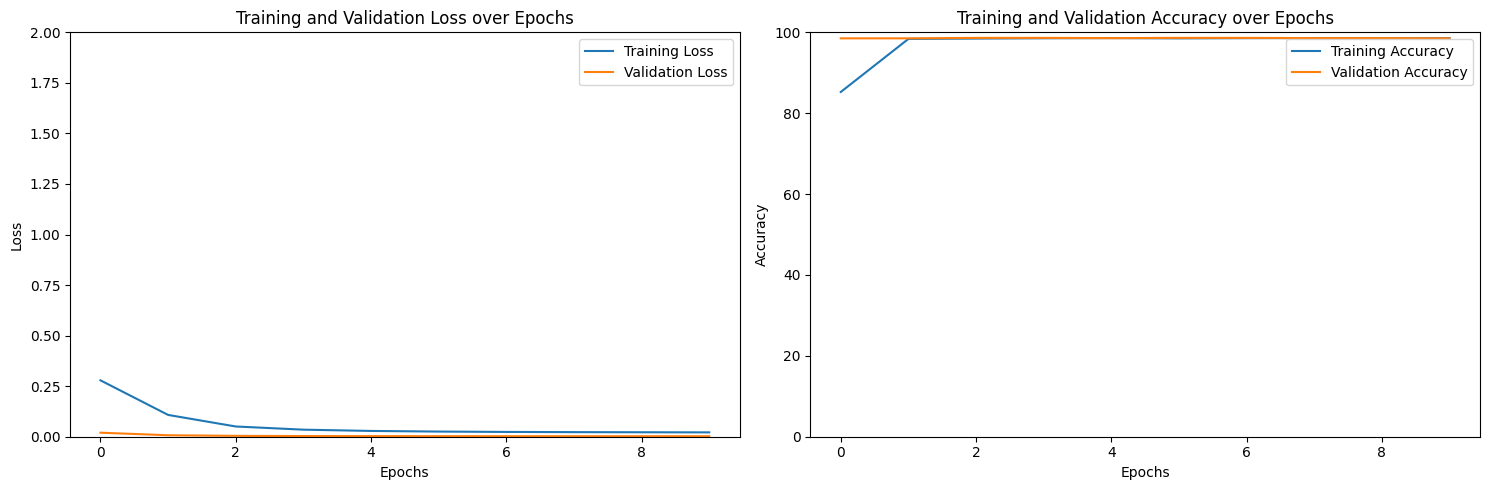

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

axs[0].plot(total_loss_train_plot, label='Training Loss')
axs[0].plot(total_loss_validation_plot, label='Validation Loss')
axs[0].set_title('Training and Validation Loss over Epochs')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')
axs[0].set_ylim([0, 2])
axs[0].legend()

axs[1].plot(total_acc_train_plot, label='Training Accuracy')
axs[1].plot(total_acc_validation_plot, label='Validation Accuracy')
axs[1].set_title('Training and Validation Accuracy over Epochs')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Accuracy')
axs[1].set_ylim([0, 100])
axs[1].legend()

plt.tight_layout()

plt.show()

In [ ]:
area = float(input("Area: "))/new_df['Area'].abs().max()
MajorAxisLength = float(input("Major Axis Length: "))/new_df['MajorAxisLength'].abs().max()
MinorAxisLength = float(input("Minor Axis Length: "))/new_df['MinorAxisLength'].abs().max()
Eccentricity = float(input("Eccentricity: "))/new_df['Eccentricity'].abs().max()
ConvexArea = float(input("Convex Area: "))/new_df['ConvexArea'].abs().max()
EquivDiameter = float(input("EquivDiameter: "))/new_df['EquivDiameter'].abs().max()
Extent = float(input("Extent: "))/new_df['Extent'].abs().max()
Perimeter = float(input("Perimeter: "))/new_df['Perimeter'].abs().max()
Roundness = float(input("Roundness: "))/new_df['Roundness'].abs().max()
AspectRation = float(input("AspectRation: "))/new_df['AspectRation'].abs().max()

my_inputs = [area, MajorAxisLength, MinorAxisLength, Eccentricity, ConvexArea, EquivDiameter, Extent, Perimeter, Roundness, AspectRation]

print("="*20)
model_inputs = torch.Tensor(my_inputs).to(device)
prediction = (model(model_inputs))
print(prediction)
print("Class is: ", round(prediction.item()))

Area: 6431.279
Major Axis Length: 145.21338
Minor Axis Length: 56.902
Eccentricity: 0.919981821
Convex Area: 6518.93759999
EquivDiameter: 90.483541
Extent: 0.8506668
Perimeter: 329.972
Roundness: 0.742255516
AspectRation: 2.551696
tensor([0.7438], grad_fn=<SigmoidBackward0>)
Class is:  1
